In [1]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
%matplotlib inline
from geolite2 import geolite2
from ip2geotools.databases.noncommercial import DbIpCity

In [2]:
# Prepping the data

data = pd.read_csv('anonymized-curriculum-access.txt', sep="\s{1}", header = None, engine='python')
data.rename(columns = {0: 'date', 1: 'access_time', 2: 'curriculum_page', 3 : 'userid', 4: 'cohort', 5: 'ip'}, inplace = True)
data['datetime'] = data.date.astype(str) + ' ' + data.access_time.astype(str)
data['datetime'] = pd.to_datetime(data.datetime)
data = data.set_index('datetime')
data.drop(columns = ['date', 'access_time'], inplace = True)
after_school = data.between_time('17:30', '08:30')

In [3]:
# Gonna go ahead and assume these first two IP addresses are from codeup San Antonio, let's confirm

data.ip.value_counts()

97.105.19.58       284579
97.105.19.61        61662
192.171.117.210      9515
71.150.217.33        6791
76.185.145.231       4754
                    ...  
107.77.218.109          1
50.27.1.235             1
107.204.49.22           1
172.58.70.192           1
95.181.238.25           1
Name: ip, Length: 5531, dtype: int64

In [4]:
# That's codeup!

(DbIpCity.get('97.105.19.58', api_key='free')).to_csv(',')

'97.105.19.58,San Antonio (Downtown),Texas,US,29.4193459,-98.4780456'

In [5]:
# As is that

(DbIpCity.get('97.105.19.61', api_key='free')).to_csv(',')

'97.105.19.61,San Antonio (Downtown),Texas,US,29.4193459,-98.4780456'

<AxesSubplot:>

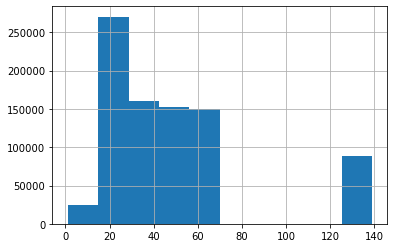

In [6]:
data['cohort'].hist()

In [7]:
# Function to show the first and last access records of the cohorts numbered higher than 100

hmm = data[data['cohort'] > 100]
things = hmm.cohort.unique().tolist()
def get_first(data, things):
    save = []
    for num in things:
        duh = data[data['cohort'] == num]
        save.append(duh.iloc[0])
        save.append(duh.iloc[-1])
    return save

In [8]:
first = get_first(data, things)

In [9]:
# Found that (before I converted the column name) these are cohorts based on first and last access date and files 
# accessed it looks like Easley is 133!

first

[curriculum_page                  /
 userid                         788
 cohort                         132
 ip                 173.175.108.125
 Name: 2020-11-03 09:06:55, dtype: object,
 curriculum_page    html-css/css-i/introduction
 userid                                     793
 cohort                                     132
 ip                              72.201.107.178
 Name: 2021-04-21 16:32:36, dtype: object,
 curriculum_page                  /
 userid                         819
 cohort                         134
 ip                 107.130.157.190
 Name: 2020-12-07 14:15:16, dtype: object,
 curriculum_page    java-iii/servlets
 userid                           834
 cohort                           134
 ip                       67.11.50.23
 Name: 2021-04-21 16:38:14, dtype: object,
 curriculum_page                /
 userid                       835
 cohort                       133
 ip                 173.173.109.5
 Name: 2020-12-08 10:49:37, dtype: object,
 curriculum_page 

<AxesSubplot:>

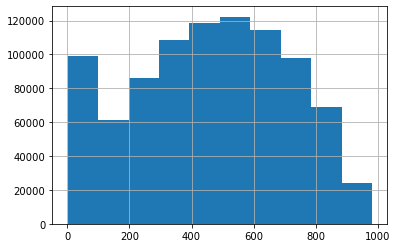

In [10]:


data['userid'].hist()

In [11]:
# What is this second ip address?

after_school.ip.value_counts()

97.105.19.58       10245
192.171.117.210     3768
97.105.19.61        2281
72.190.174.52       1366
70.112.179.142      1312
                   ...  
107.77.218.136         1
50.27.1.235            1
99.203.90.176          1
107.77.221.69          1
99.203.155.123         1
Name: ip, Length: 3130, dtype: int64

In [12]:
# The latitude and longitude coordinates give me a place located in Houston that is not the Houston codeup 

(DbIpCity.get('192.171.117.210', api_key='free')).to_csv(',')

'192.171.117.210,San Antonio (Uptown),Texas,US,29.7458025,-95.46424437845525'

<AxesSubplot:xlabel='datetime', ylabel='Count'>

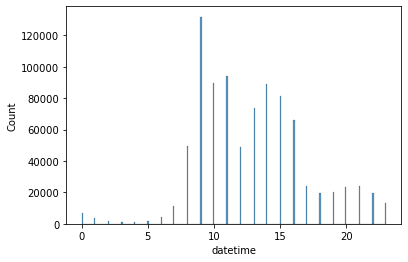

In [13]:
# Access rates by hour

sns.histplot(data = data, x = data.index.hour)

In [14]:
# Let's try to find me! 849
easley = data[data['cohort'] == 133]
easley.tail(50)

,curriculum_page,userid,cohort,ip
datetime,,,,
2021-04-21 09:54:59,anomaly-detection/overview,847,133.0,173.174.194.60
2021-04-21 09:54:59,anomaly-detection/AnomalyDetectionCartoon.jpeg,847,133.0,173.174.194.60
2021-04-21 09:54:59,anomaly-detection/AnomalyDetectionCartoon.jpeg,847,133.0,173.174.194.60
2021-04-21 09:55:07,anomaly-detection/continuous-probabilistic-met...,847,133.0,173.174.194.60
2021-04-21 10:07:24,anomaly-detection/continuous-probabilistic-met...,836,133.0,99.43.137.186
2021-04-21 10:07:26,anomaly-detection/overview,836,133.0,99.43.137.186
2021-04-21 10:07:26,anomaly-detection/AnomalyDetectionCartoon.jpeg,836,133.0,99.43.137.186
2021-04-21 10:07:29,anomaly-detection/overview,844,133.0,24.160.7.8
2021-04-21 10:07:29,anomaly-detection/continuous-probabilistic-met...,836,133.0,99.43.137.186


<AxesSubplot:xlabel='userid', ylabel='Count'>

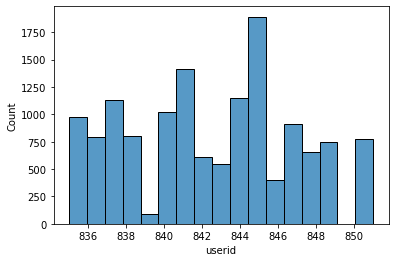

In [15]:
# Total number of accesses by student ID in easley

easley_students = easley[easley['userid'] > 800]
sns.histplot(data = easley_students, x = easley_students.userid, bins = 17)

In [16]:
# The actuual displayed counts

easley_students.userid.value_counts()

845    1891
841    1414
844    1152
837    1131
840    1018
835     974
847     909
838     798
836     795
851     778
849     744
848     653
842     608
843     550
846     400
839      92
Name: userid, dtype: int64

<AxesSubplot:xlabel='datetime', ylabel='Count'>

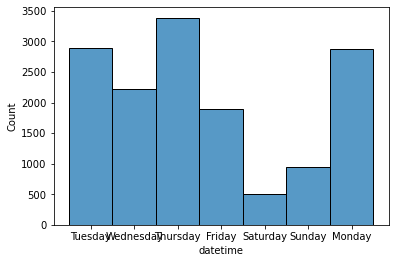

In [17]:
# Total accesses of curriculum by day of the week

sns.histplot(data = easley, x = easley.index.day_name())

<AxesSubplot:xlabel='datetime', ylabel='Count'>

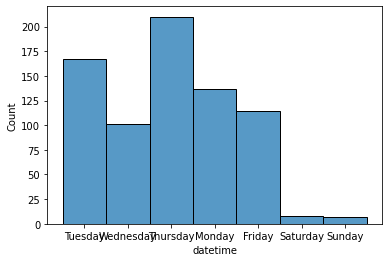

In [18]:
# My own accesses by day of the week

my_stats = easley[easley['userid'] == 849]
sns.histplot(data = my_stats, x = my_stats.index.day_name())

In [21]:
# Percent of accesses each student has

round((easley_students.userid.value_counts()/14715), 3)

845    0.129
841    0.096
844    0.078
837    0.077
840    0.069
835    0.066
847    0.062
838    0.054
836    0.054
851    0.053
849    0.051
848    0.044
842    0.041
843    0.037
846    0.027
839    0.006
Name: userid, dtype: float64